# Julia言語と高校数学

このノートブックでは、Julia言語を使って高校数学の様々な分野を学習します。

Juliaはを用いて、数学の概念を直感的に表現できます。

![自己紹介](./p01.png)

## 1. Julia言語の概要

Juliaは統計処理や科学技術計算、機械学習に強いプログラミング言語です。
Google Colabで無料で利用できるようになりました。

**特徴：**
- 高速な数値計算
- 数学的記法に近い文法
- 豊富な数学・統計ライブラリ

公式サイト: https://julialang.org/

![Julialang](./julialang.png)

https://zenn.dev/dannchu/articles/296dce4bf7c701

![colab](./googlecolab.png)





## 2. 基本的な計算

In [3]:
# 四則演算
1+1

2

In [4]:
2^10

1024

In [5]:
10 ÷ 3  # ÷は\divで入力

3

In [ ]:
# 数学定数
π   #πは\pi + tab で入力

π = 3.1415926535897...

In [7]:
√2    # √は\sqrt +tab で入力

1.4142135623730951

In [8]:
ℯ   # ℯは\euler + tab で入力

ℯ = 2.7182818284590...

In [9]:
# 代入・計算

x = 1

1

In [10]:
y = 4

4

In [11]:
2x-4y

-14

In [12]:
ϕ = (1 + √5)/2

1.618033988749895

In [14]:
ϕ^2 - ϕ + 1

2.0

In [15]:
# 分数計算（小数と有理数の違い）
1/3 + 3*2/4     # 小数計算

1.8333333333333333

In [16]:
1//3 + 3*2//4   # //で有理数


11//6

In [17]:
12//8   # 有理数の約分

3//2

In [18]:
# 関数の定義
f(x) = x^2 + 2x - 4

f (generic function with 1 method)

In [19]:
f(0), f(2), f(-1), f(√2)

(-4, 4, -5, 0.8284271247461907)

## 3. グラフ描画

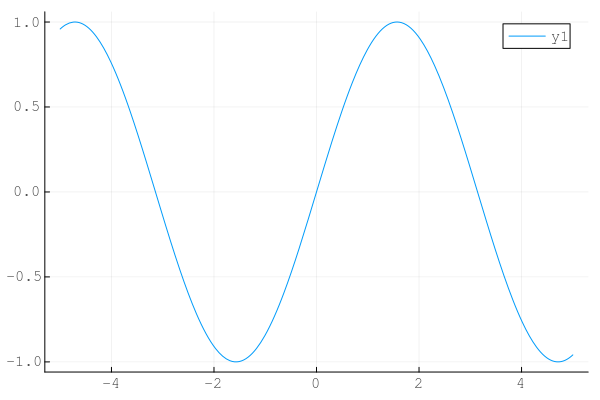

In [36]:
using Plots #描画パッケージ
plot(sin)


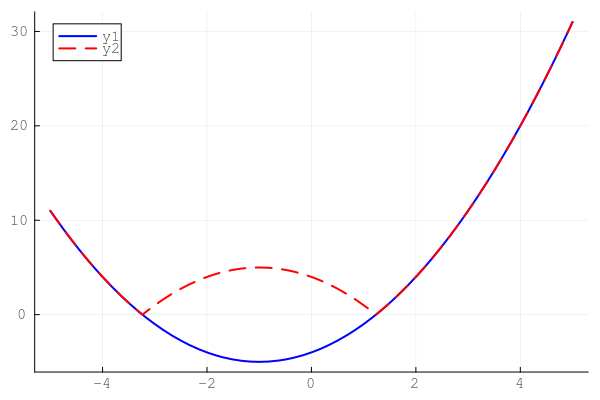

In [34]:
# 2次関数のグラフ
f(x) = x^2 + 2x - 4
g(x) = abs(f(x))

plot(f, lw=2,color=:blue)
plot!(g, lw=2,ls=:dash, color=:red)


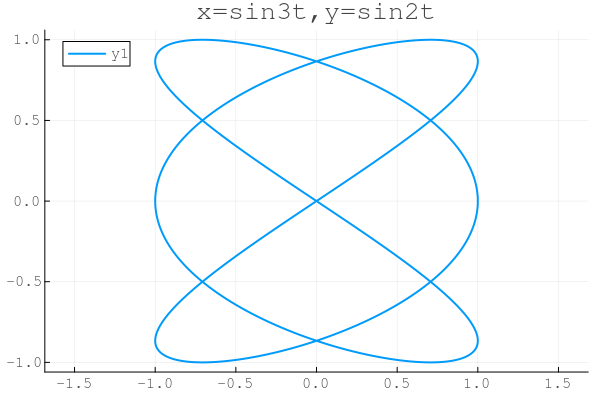

In [38]:
# 媒介変数表示（リサージュ曲線）
t = 0:0.01:2π
xs = sin.(3t)
ys = sin.(2t)

plot(xs, ys, aspectratio=true,lw=2,title="x=sin3t,y=sin2t")

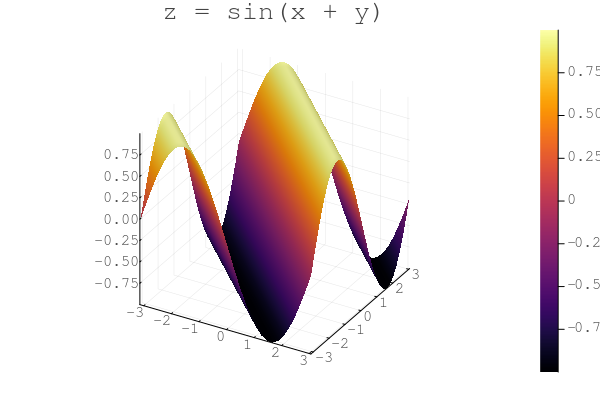

In [37]:
# 3D曲面
x = -π:0.2:π
y = -π:0.2:π
z = [sin(xi + yi) for xi in x, yi in y]

surface(x, y, z, title="z = sin(x + y)")

## 4. 方程式の解法

In [ ]:
# 記号的解法
# using Pkg
# Pkg.add("Nemo")
# Pkg.add("Symbolics")

using Nemo , Symbolics

@variables x
f(x) = x^2 + 2x - 4

println("x² + 2x - 4 = 0 の解:")
symbolic_solve(f(x),x)


In [ ]:
# 解の公式の一般形

@variables a b c x
println("ax² + bx + c = 0 の解:")
symbolic_solve(a*x^2 + b*x + c, x)

In [ ]:
# 数値的解法
# using Pkg
# Pkg.add("SimplePolynomials")

using SimplePolynomials

x = getx()
println("x⁵ - 1 = 0 の解（5次単位根）:")
Z = SimplePolynomials.roots(x^5 - 1)

In [ ]:
#複素数平面上に図示

using Plots
scatter(Z,
          xlim=(-1.5,1.5),
          ylim=(-1.5,1.5),
          aspectratio=true)

## 5. 漸化式と数列

In [56]:
# 漸化式 a₁ = 3, aₙ₊₁ = 2aₙ + 1
function seq_a(n::Int)
    if n == 1
        3
    elseif n ≥ 2
        2 * seq_a(n - 1) + 1
    end
end

# 最初の10項を表示
println("数列の最初の10項:")
for i in 1:10
    println("a($i) = ", seq_a(i))
end

数列の最初の10項:
a(1) = 3
a(2) = 7
a(3) = 15
a(4) = 31
a(5) = 63
a(6) = 127
a(7) = 255
a(8) = 511
a(9) = 1023
a(10) = 2047


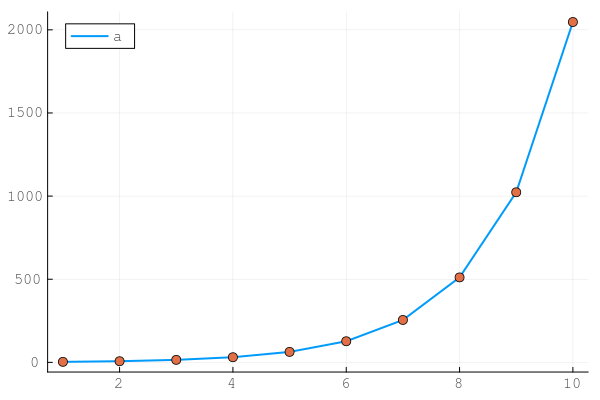

GKS: glyph missing from current font: 8345
GKS: glyph missing from current font: 8345


In [57]:
# 数列のグラフ化
using Plots 
X = 1:10
Y = seq_a.(X)

plot(X, Y, label="aₙ", lw=2)
scatter!(X, Y, label="", markersize=5)

## 6. 最適化問題


- $3x+4y \leqq 10$，$4x+y \leqq 4$，$x \geqq 0$，$y \geqq 0$ のとき，$x+y$の最大値・最小値は？

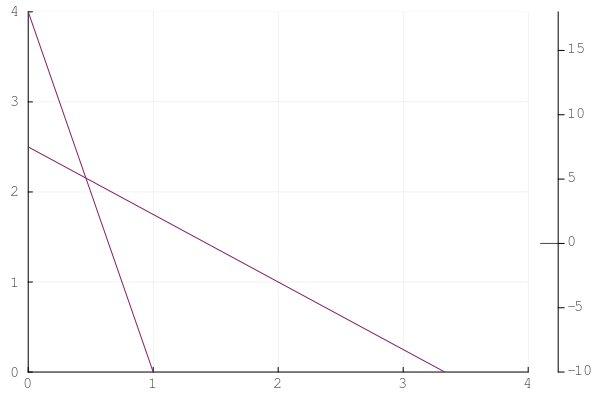

In [58]:
using Plots
#陰関数表示
contour(0:0.01:4,0:0.01:4,(x,y)->3x+4y-10,levels=[0])
contour!(0:0.01:4,0:0.01:4,(x,y)->4x+y-4,levels=[0])

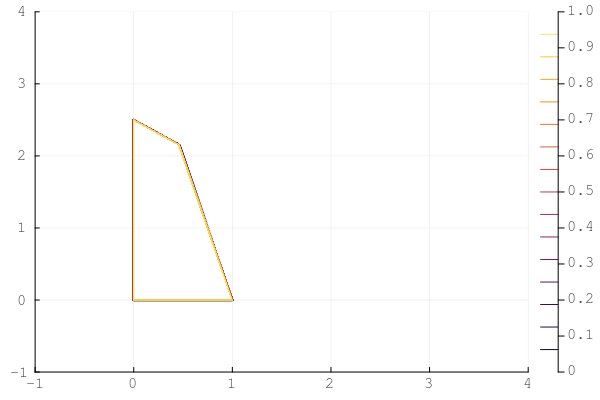

In [59]:
function f(x,y)
    if 3x+4y ≤ 10 && 4x+y ≤ 4 && x ≥ 0 && y ≥ 0
        1
    else 0
    end
end

contour(-1:0.01:4,-1:0.01:4,f)

In [60]:
function optimize_z()
    z_vals = Float64[]
    for x = 0:0.001:1 , y = 0:0.001:4
        if f(x,y) == 1
          xs , ys = x , y
          zs = xs + ys
          push!(z_vals, zs)
        end
    end
    return minimum(z_vals), maximum(z_vals)
end

t = optimize_z()
println("最小値は$(t[1])，最大値は$(t[2])")

最小値は0.0，最大値は2.6149999999999998


- $a$，$b$を正の実数とする。$\displaystyle{a^3+b^3-2ab}$の最大値を求めよ。

In [70]:
using Optim

# 目的関数（2変数関数を想定。xはベクトル）
f(x) = x[1]^3+x[2]^3-2*x[1]*x[2]

# 初期値（適当でOK）
x0 = [0.2, 0.2]

# 制約条件: a > 0, b > 0
lower = [1e-6, 1e-6]  # 0に近い正の値
upper = [1.0, 1.0]  # 適当な大きい値（必要なら調整）

# 最適化
result = optimize(f, lower, upper, x0)

# 最適解
x_opt = Optim.minimizer(result)

# 最小値
min_f = Optim.minimum(result)

println("最適な (a, b) = ", x_opt)
println("最小値 f(a, b) = ", max_f)

最適な (a, b) = [0.6666666665991605, 0.6666666665991605]
最小値 f(a, b) = 1.999999999999


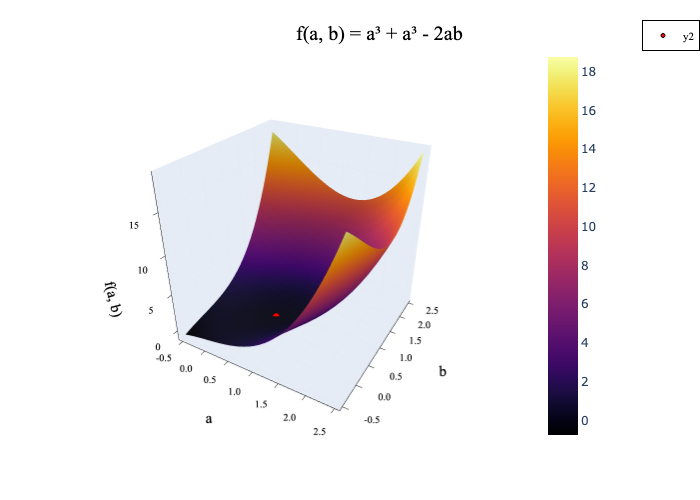

In [ ]:
using Plots
# plotlyjs()

# 関数の3Dプロット
x_range = -0.5:0.1:2.5
y_range = -0.5:0.1:2.5
z_vals = [xi^3 + yi^3 - 2*xi*yi for xi in x_range, yi in y_range]

surface(x_range, y_range, z_vals, 
        title="f(a, b) = a³ + a³ - 2ab",
        xlabel="a",
        ylabel="b",
        zlabel="f(a, b)")

# 最適解をプロット上に表示
scatter3d!([x_opt[1]], [x_opt[2]], [min_f], 
           color=:red, 
           markersize=2)

- $\pi\leqq x\leqq 10\pi$ のとき，$y=\frac{\sin x}{x} $の最大値・最小値を求めてみよう！

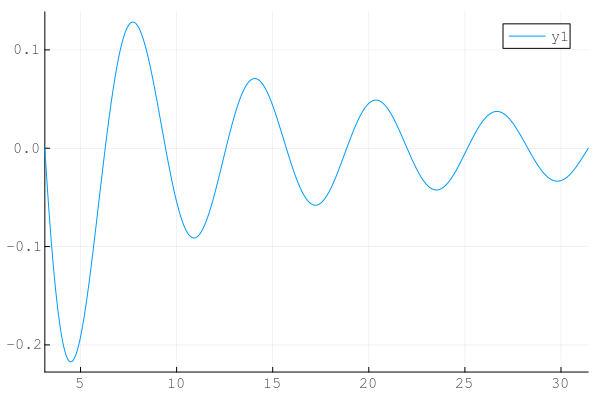

In [50]:
using Plots

# 関数定義
f(x) = sin(x) / x

plot(f , xlim=(π,10π))

In [51]:
# 定義域: -π ≤ x ≤ 10π
x_range = -π:0.001:10π

# y値を計算
y_values = f.(x_range)

# 最大値・最小値とその位置を求める
max_val = maximum(y_values)
min_val = minimum(y_values)
max_idx = argmax(y_values)
min_idx = argmin(y_values)
max_x = x_range[max_idx]
min_x = x_range[min_idx]

# 結果を表示
println("=== y = sin(x)/x の最大値・最小値 ===")
println("定義域: -π ≤ x ≤ 10π")
println()
println("最大値: $max_val")
println("最大値の位置: x = $max_x (≈ $(max_x/π)π)")
println("確認: f($max_x) = $(f(max_x))")
println()
println("最小値: $min_val")
println("最小値の位置: x = $min_x (≈ $(min_x/π)π)")
println("確認: f($min_x) = $(f(min_x))")


=== y = sin(x)/x の最大値・最小値 ===
定義域: -π ≤ x ≤ 10π

最大値: 0.9999999723448173
最大値の位置: x = 0.0004073464102067881 (≈ 0.0001296623894702984π)
確認: f(0.0004073464102067881) = 0.9999999723448173

最小値: -0.21723362821073738
最小値の位置: x = 4.493407346410207 (≈ 1.4302959810132418π)
確認: f(4.493407346410207) = -0.21723362821073738


- $a>0$ ，$b>0$ のとき，$a^3+b^3-2ab$の最小値を求めてみよう！

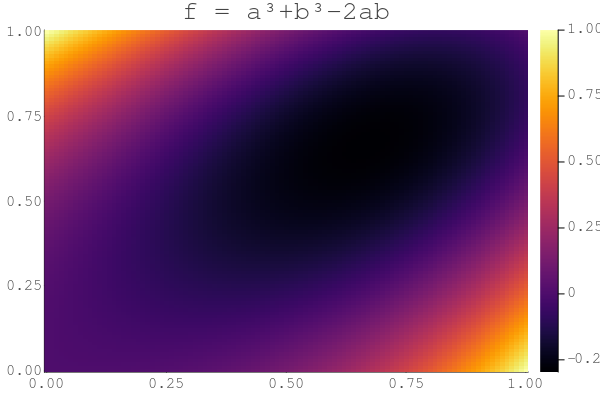

In [45]:
# 図示してみよう。

f(a,b) = a^3 + b^3 -2*a*b

x = 0:0.01:1
y = 0:0.01:1
z = [f(xi,yi) for xi in x, yi in y]

heatmap(x, y, z, title="f = a³+b³-2ab")

In [48]:

# 最小値とその位置を取得
min_val = minimum(z)
min_idx = argmin(z)
min_x = x[min_idx[1]]
min_y = y[min_idx[2]]

println("最小値: $min_val")
println("最小値の位置: ($min_x, $min_y)")
println("確認: f($min_x, $min_y) = $(f(min_x, min_y))")

最小値: -0.29627400000000004
最小値の位置: (0.67, 0.67)
確認: f(0.67, 0.67) = -0.29627400000000004


## まとめ

このノートブックでは、Julia言語を使って高校数学の様々な分野を学習しました：

### 学習した内容
1. **基本計算**: 四則演算、関数定義、数学定数
2. **グラフ描画**: 2D・3D関数、媒介変数表示、リサージュ曲線
3. **方程式の解法**: 記号的解法（解の公式）と数値的解法
4. **数列と漸化式**: 再帰的定義、一般項の推定、グラフ化
5. **最適化問題**: 線形計画法、非線形最適化
6. **統計・確率**: 信頼区間、分布の可視化

### Julia言語の特徴
- **数学的記法**: √、π、÷などの記号が直接使用可能
- **高速な数値計算**: 科学技術計算に最適化された言語
- **豊富なライブラリ**: グラフ描画、統計、最適化などの専門パッケージ
- **インタラクティブ性**: ノートブック環境での試行錯誤が容易

### 教育的効果
- **理論と実践の融合**: 数学の概念を可視化・実験できる
- **問題解決能力**: 複雑な計算を分解して段階的に解決
- **データ分析スキル**: 統計的思考と計算技術の習得
- **プログラミング思考**: 論理的・構造的な思考力の向上

### 発展的学習への道筋
1. **大学数学への準備**: 線形代数、微積分学、統計学
2. **データサイエンス**: 機械学習、データ可視化
3. **科学計算**: 物理シミュレーション、数値解析
4. **プログラミング**: アルゴリズム設計、ソフトウェア開発

Julia言語を使うことで、数学の抽象的な概念を具体的に可視化し、実験的に理解を深めることができます。

理論と実践を結びつけることで、より深い数学的洞察が得られるでしょう。

## 参考資料

### その他のサイト

- [大学入試とJulia言語（JuliaTokai #21）](https://github.com/shimizudan/20250327tokyo-u?tab=readme-ov-file)
- [オンライン整数列大辞典(OEIS)に数列を登録してみた！](https://github.com/shimizudan/20250216sundaymath?tab=readme-ov-file)

### 参考サイト

- [Julia言語 ドキュメント（日本語翻訳版）](https://atelierarith.github.io/UnofficialJuliaDocJP/index.html) - ごまふあざらし(GomahuAzarashi)
- [数学と物理におけるJuliaの活用](https://akio-tomiya.github.io/julia_imi_workshop2023/)
- [数学ソフトウェアとフリードキュメント XXVIII での講演資料](https://github.com/genkuroki/msfd28/blob/master/README.md) - 黒木玄
- [中心極限定理の視覚化の例](https://colab.research.google.com/drive/1OKlTBuxXw_gA6oyzlk5ACInH2PaebdjC?usp=sharing) - 黒木玄
- [数値計算法基礎 (2023)](http://www.cas.cmc.osaka-u.ac.jp/~paoon/Lectures/2023-8Semester-NA-basic/01-guide-of-julia/) - 降籏大介
- [Juliaで学ぶ最適化と機械学習（2024）](https://matsui528.github.io/julia_opt_ml_2024/) - 松井勇佑

### 書籍

- [実践Julia入門](https://www.amazon.co.jp/実践Julia入門-後藤-俊介/dp/4297133504) - 後藤俊介
- [Juliaではじめる数値計算入門](https://www.amazon.co.jp/Julia%E3%81%A7%E3%81%AF%E3%81%98%E3%82%81%E3%82%8B%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E5%85%A5%E9%96%80-%E6%B0%B8%E4%BA%95-%E4%BD%91%E7%B4%80/dp/4297141280) - 永井佑紀
- [スタンフォード ベクトル・行列からはじめる最適化数学](https://www.amazon.co.jp/スタンフォード-ベクトル・行列からはじめる最適化数学-ＫＳ情報科学専門書-ステファン・ボイド-ebook/dp/B0967Y28B6) - スティーブン・ボイド他

### 学習のヒント

1. **環境構築**: Google ColabやJupyter Notebookを使用すると簡単に始められます
2. **パッケージ管理**: 必要なパッケージは `Pkg.add()` で簡単にインストール可能
3. **エラーへの対処**: エラーメッセージを読んで、一つずつ問題を解決していきましょう
4. **実験的学習**: 数値を変更して結果の変化を観察することで理解が深まります
5. **可視化の活用**: グラフで結果を確認することで直感的理解が得られます

### コミュニティ

- [Julia言語 公式フォーラム](https://discourse.julialang.org/)
- [Julia Tokyo（日本のコミュニティ）](https://juliatokyo.connpass.com/)
- [GitHub Julia Organization](https://github.com/JuliaLang)

このノートブックを参考に、ぜひJulia言語を使った数学的探究を楽しんでください！